In [68]:
import json
import pandas as pd
import csv
import numpy as np
import matplotlib.pyplot as plt

In [69]:
import requests

url = "https://cartobat.com/434152544F42415450616C616973656175/getRawDataForCartoWear/C77C2F92664E/2022-12-09%2012:00:00.000/2022-12-09%2014:00:00.000"

reponse = requests.get(url)
print(reponse)
contenu = reponse.json()
print(type(contenu))
contenu['resultat']

<Response [200]>
<class 'dict'>


[{'timestamp': '2022-12-09 13:53:09.213',
  'macModule': 'C45BBE39870E',
  'rssi': -78},
 {'timestamp': '2022-12-09 13:52:59.380',
  'macModule': 'C45BBE39870E',
  'rssi': -78},
 {'timestamp': '2022-12-09 13:52:49.612',
  'macModule': 'C45BBE39870E',
  'rssi': -77},
 {'timestamp': '2022-12-09 13:52:37.945',
  'macModule': 'C45BBE39870E',
  'rssi': -80},
 {'timestamp': '2022-12-09 13:52:30.086',
  'macModule': 'C45BBE39870E',
  'rssi': -79},
 {'timestamp': '2022-12-09 13:52:18.471',
  'macModule': 'C45BBE39870E',
  'rssi': -80},
 {'timestamp': '2022-12-09 13:52:08.734',
  'macModule': 'C45BBE39870E',
  'rssi': -76},
 {'timestamp': '2022-12-09 13:51:59.009',
  'macModule': 'C45BBE39870E',
  'rssi': -76},
 {'timestamp': '2022-12-09 13:51:45.447',
  'macModule': 'C45BBE39870E',
  'rssi': -78},
 {'timestamp': '2022-12-09 13:51:37.607',
  'macModule': 'C45BBE39870E',
  'rssi': -78},
 {'timestamp': '2022-12-09 13:51:29.865',
  'macModule': 'C45BBE39870E',
  'rssi': -80},
 {'timestamp': '2022-

In [70]:
df_2 = pd.DataFrame(contenu['resultat'])
df_2["macModule"].unique()
df_2["date"] = pd.to_datetime(df_2["timestamp"])
df_2 = df_2.sort_values('timestamp').reset_index()
df_2['Time'] = pd.to_datetime(df_2['date']).dt.time
df_2['hourMinute'] = df_2.date.dt.hour.astype(str) + 'h' + df_2.date.dt.minute.astype(str)
df_2=df_2.drop(columns=["timestamp","date","Time","index"])

In [71]:
df_2

,macModule,rssi,hourMinute
0,C45BBE39870E,-77,12h0
1,C45BBE39870E,-78,12h0
2,C45BBE39870E,-80,12h0
3,C45BBE39870E,-79,12h0
4,C45BBE39870E,-80,12h1
...,...,...,...
1524,C45BBE39870E,-79,13h52
1525,C45BBE39870E,-80,13h52
1526,C45BBE39870E,-77,13h52
1527,C45BBE39870E,-78,13h52


In [72]:
df_2=df_2[df_2["macModule"].str.contains("C45BBE38FEAA|C45BBE39870E|C45BBE39F4D6|A8032A31204A")==False] 
df_2


,macModule,rssi,hourMinute
115,A8032A311FAA,-75,12h24
120,A8032A311FAA,-77,12h24
121,A8032A311FAA,-66,12h24
122,A8032A311FAA,-80,12h24
123,C45BBE39F9AE,-71,12h24
...,...,...,...
1389,A8032A31204E,-79,13h30
1390,C45BBE39F9AE,-64,13h30
1391,A8032A311FAA,-71,13h30
1392,A8032A311FAA,-74,13h30


In [73]:
df_2.to_csv('bd2.csv', index=False) 

In [74]:
df_2["macModule"].unique()

array(['A8032A311FAA', 'C45BBE39F9AE', 'A8032A31204E', 'C45BBE37B346',
       'C45BBE39F56A', 'C45BBE386952', 'C45BBE384CD2', 'C45BBE386362'],
      dtype=object)

In [75]:
my_map={'A8032A31204E':"A8032A31204E_29m", 'C45BBE37B346':"C45BBE37B346_52m", 'C45BBE39F9AE':"C45BBE39F9AE_13m", 'A8032A311FAA':"A8032A311FAA_4m",
       'C45BBE39F56A':"C45BBE39F56A_56m", 'C45BBE386952':"C45BBE386952_65m", 'C45BBE384CD2':"C45BBE384CD2_89m", 'C45BBE386362':"C45BBE386362_80m"}
df_2["macModule"]=df_2["macModule"].map(my_map)

/var/folders/jc/s5z2r_g96mqf6zxqdrrz7kjh0000gp/T/ipykernel_8928/957260853.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2["macModule"]=df_2["macModule"].map(my_map)


In [76]:
df_2.to_csv(path_or_buf='cc.csv', decimal='.', sep= ',', index=False)

In [77]:
df_2

,macModule,rssi,hourMinute
115,A8032A311FAA_4m,-75,12h24
120,A8032A311FAA_4m,-77,12h24
121,A8032A311FAA_4m,-66,12h24
122,A8032A311FAA_4m,-80,12h24
123,C45BBE39F9AE_13m,-71,12h24
...,...,...,...
1389,A8032A31204E_29m,-79,13h30
1390,C45BBE39F9AE_13m,-64,13h30
1391,A8032A311FAA_4m,-71,13h30
1392,A8032A311FAA_4m,-74,13h30


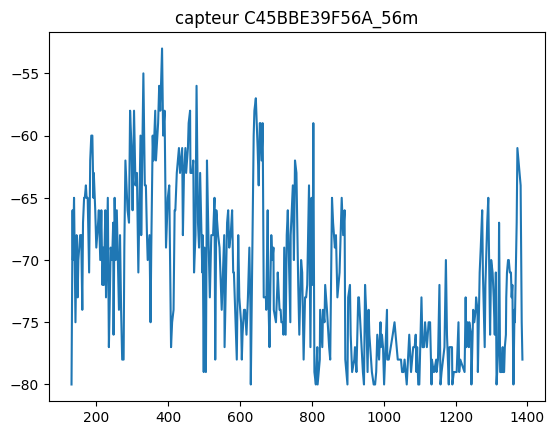

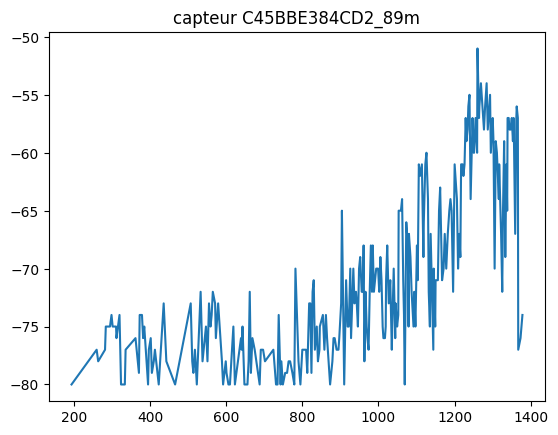

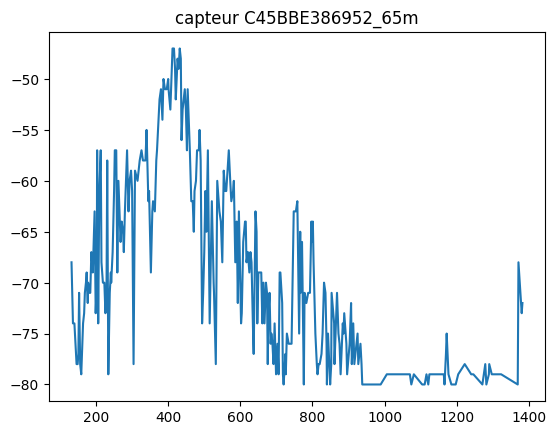

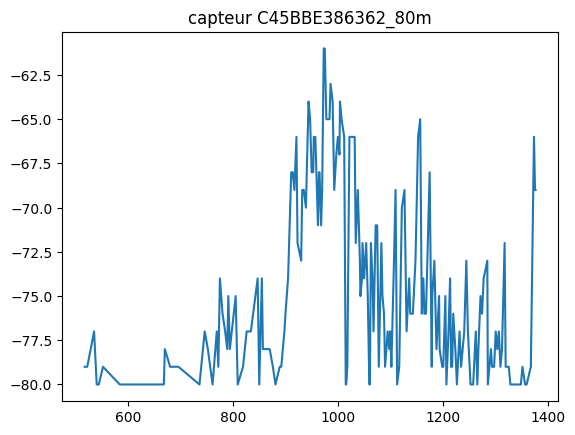

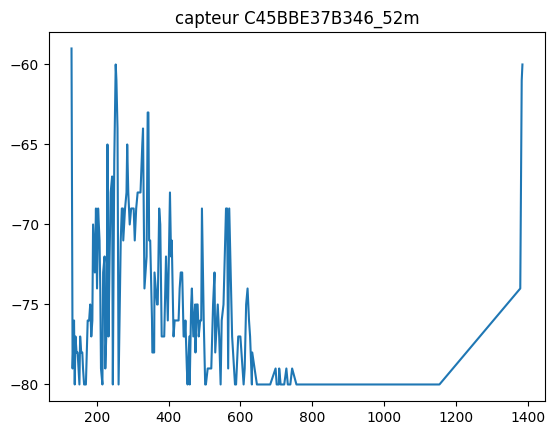

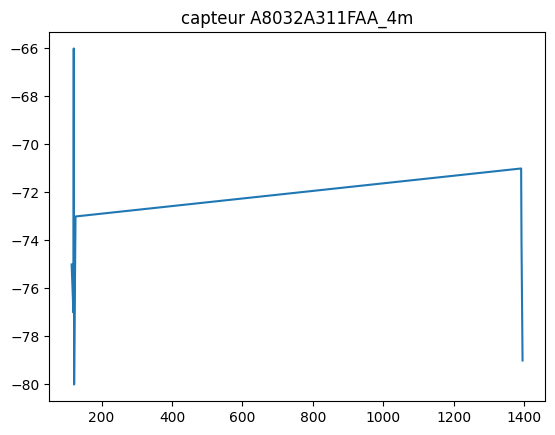

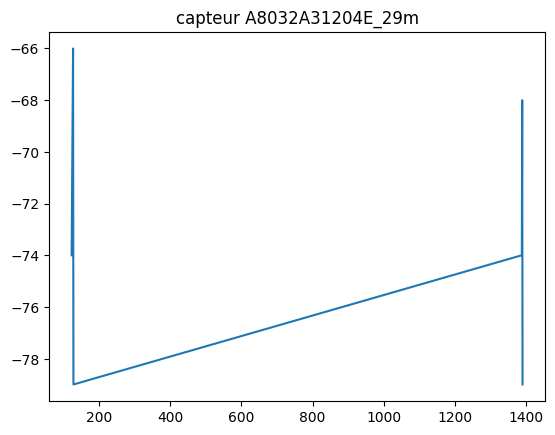

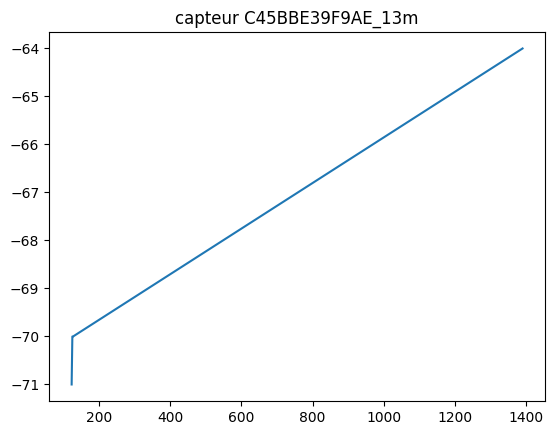

In [78]:
for mac in df_2.macModule.value_counts().keys().tolist():
    df_2[df_2.macModule == mac]['rssi'].plot()
    plt.title('capteur '+ mac)
    plt.show()

In [79]:
exp = pd.read_csv('09_12.csv')
df = df_2.merge(exp, left_on ='hourMinute', right_on='Time', how='left')
df=df.drop(columns=["hourMinute","Time"])

In [80]:
df.to_csv(path_or_buf='po1.csv', decimal='.', sep= ',', index=False)

In [81]:
df.dropna()
df.dropna().reset_index(drop=True)

,macModule,rssi,Position
0,C45BBE386952_65m,-71,60.0
1,C45BBE37B346_52m,-77,60.0
2,C45BBE39F56A_56m,-68,60.0
3,C45BBE386952_65m,-78,60.0
4,C45BBE37B346_52m,-78,60.0
...,...,...,...
575,C45BBE384CD2_89m,-57,90.0
576,C45BBE384CD2_89m,-56,90.0
577,C45BBE39F56A_56m,-74,90.0
578,C45BBE39F56A_56m,-75,90.0


In [82]:
capteurs=df["macModule"].unique()
df_final={}
df1=pd.DataFrame()
positions=df["Position"].unique()
for p in positions:
    df_final[p]=pd.DataFrame()
    for c in capteurs:
       df1=df[df["Position"]==p]
       df_final[p][c]=pd.Series(df1[df1["macModule"]==c]["rssi"].values)

In [83]:
capteurs=df["macModule"].unique()
df_final2={}
df2=pd.DataFrame()
positions=df["Position"].unique()
for p in capteurs:
    df_final2[p]=pd.DataFrame()
    for c in positions:
       df2=df[df["macModule"]==p]
       df_final2[p][c]=pd.Series(df2[df2["Position"]==c]["rssi"].values)

In [84]:
capteurs

array(['A8032A311FAA_4m', 'C45BBE39F9AE_13m', 'A8032A31204E_29m',
       'C45BBE37B346_52m', 'C45BBE39F56A_56m', 'C45BBE386952_65m',
       'C45BBE384CD2_89m', 'C45BBE386362_80m'], dtype=object)

In [85]:
positions.sort()
positions= positions[~np.isnan(positions)]
positions

array([60., 61., 62., 63., 64., 65., 66., 67., 68., 69., 70., 71., 72.,
       73., 74., 75., 77., 78., 79., 80., 81., 82., 83., 84., 85., 86.,
       87., 88., 89., 90.])

In [86]:
for p in capteurs:
    print(df_final2[p].describe())

       NaN   60.0  61.0  62.0  63.0  64.0  65.0  66.0  67.0  68.0  ...  81.0  \
count   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
mean    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN   
std     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN   
min     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN   
25%     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN   
50%     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN   
75%     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN   
max     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN   

       82.0  83.0  84.0  85.0  86.0  87.0  88.0  89.0  90.0  
count   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
mean    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
std     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
min     NaN   NaN   NaN   NaN  

In [87]:
for p in positions:
    print(df_final[p].describe())

       A8032A311FAA_4m  C45BBE39F9AE_13m  A8032A31204E_29m  C45BBE37B346_52m  \
count              0.0               0.0               0.0          5.000000   
mean               NaN               NaN               NaN        -78.400000   
std                NaN               NaN               NaN          1.140175   
min                NaN               NaN               NaN        -80.000000   
25%                NaN               NaN               NaN        -79.000000   
50%                NaN               NaN               NaN        -78.000000   
75%                NaN               NaN               NaN        -78.000000   
max                NaN               NaN               NaN        -77.000000   

       C45BBE39F56A_56m  C45BBE386952_65m  C45BBE384CD2_89m  C45BBE386362_80m  
count          5.000000          5.000000               0.0               0.0  
mean         -68.400000        -75.000000               NaN               NaN  
std            3.361547          3.3911

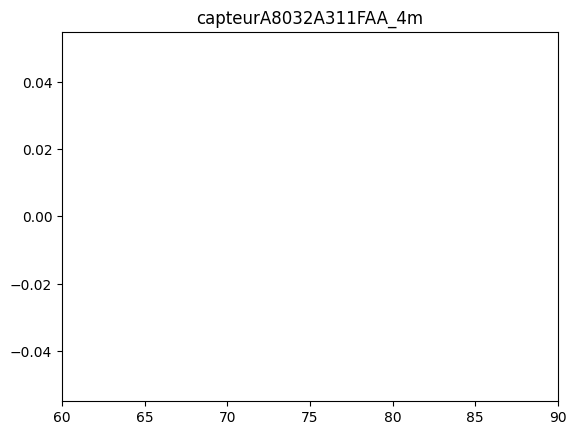

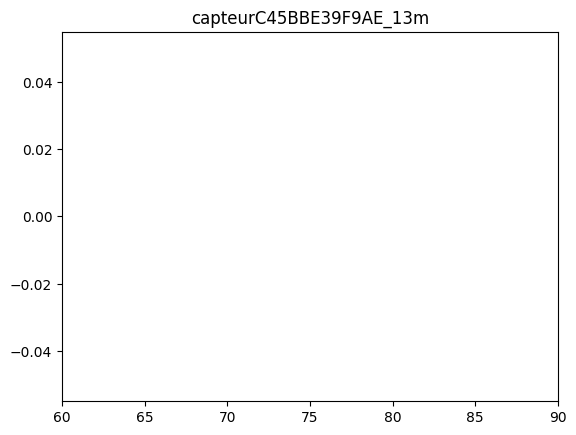

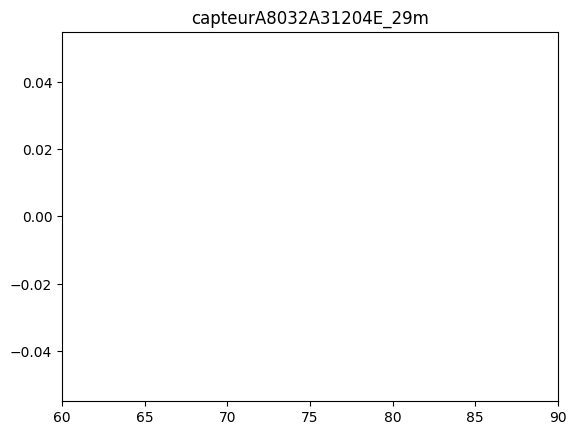

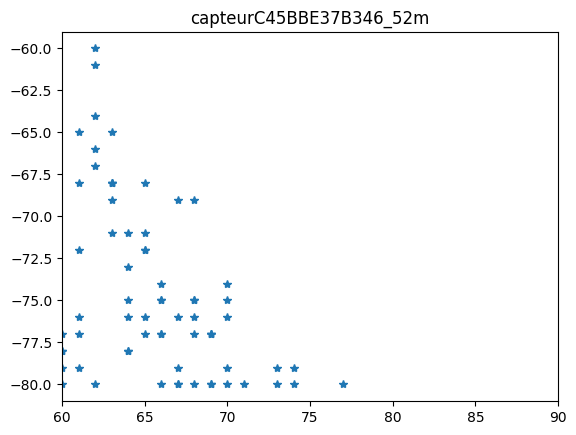

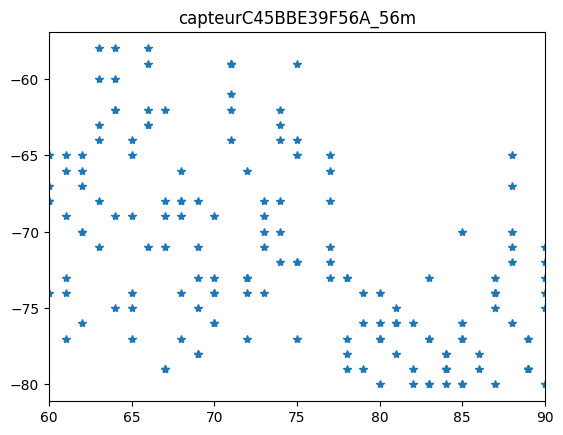

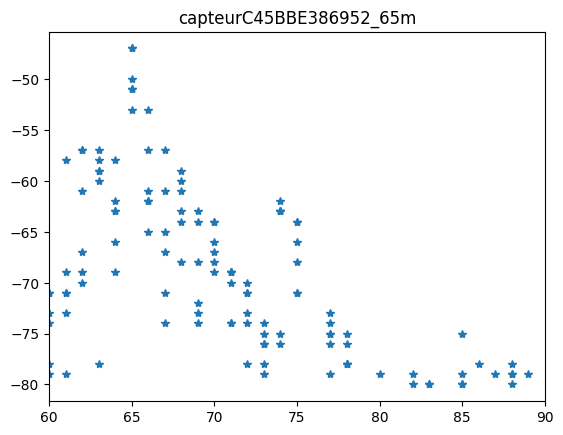

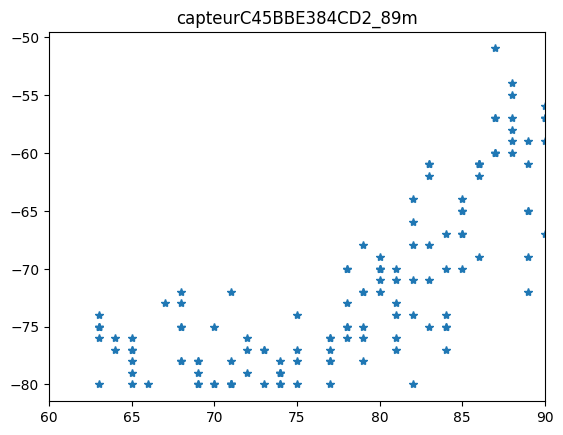

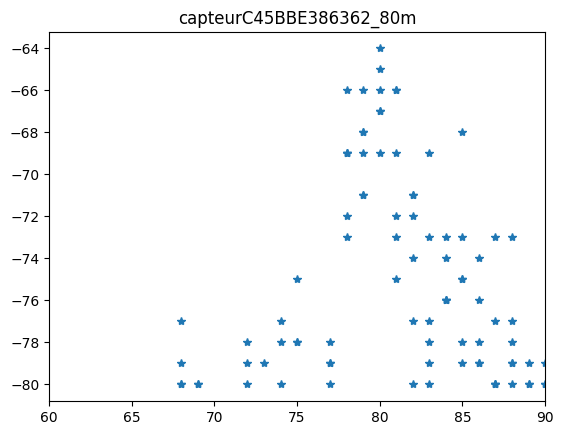

In [88]:
for d in capteurs:
    df3=df[df["macModule"]==d]
    plt.plot(df3["Position"],df3["rssi"],"*")
    plt.title("capteur"+str(d))
    plt.xlim(60,90)
    plt.show()

In [89]:
# for p in positions:
#     df_final[p].to_csv('df_pos2_'+str(p)+'.csv', index=False) 

for p in capteurs:
    df_final2[p].to_csv('2_3.1_Capteur'+str(p)+'.csv', index=False) 

# for p in positions:
#     s=pd.read_csv('C:\\Users\\abdel\\Desktop\\Capteurs\\Positions\\df_pos2_'+str(p)+'.csv') 
#     print(p,":")
#     print(s,"\n")
# capteurs2=['A8032A31204E', 'C45BBE37B346', 'C45BBE39F9AE',
#        'A8032A311FAA', 'C45BBE39F56A', 'C45BBE386952',
#        'C45BBE384CD2', 'C45BBE386362']
# for p in capteurs2:
#     s=pd.read_csv('C:\\Users\\abdel\\Desktop\\Capteurs\\Capteurs\\df_cap2_'+str(p)+'.csv') 
#     print(p,":")
#     print(s,"\n")

In [90]:
capteurs

array(['A8032A311FAA_4m', 'C45BBE39F9AE_13m', 'A8032A31204E_29m',
       'C45BBE37B346_52m', 'C45BBE39F56A_56m', 'C45BBE386952_65m',
       'C45BBE384CD2_89m', 'C45BBE386362_80m'], dtype=object)

### Approche Max

In [36]:
import requests
def approche1(t1="08:53",t2="08:54"):

   url = "https://cartobat.com/434152544F42415450616C616973656175/getRawDataForCartoWear/C77C2F92664E/2022-11-18%20"+t1+":00.000/2022-11-18%20"+t2+":00.000"

   reponse = requests.get(url)
   print(reponse)
   contenu = reponse.json()
   print(type(contenu))
   contenu['resultat']
   
   df_test = pd.DataFrame(contenu['resultat'])
   df_test["macModule"].unique()
   df_test["date"] = pd.to_datetime(df_test["timestamp"])
   df_test = df_test.sort_values('timestamp').reset_index()
   df_test['Time'] = pd.to_datetime(df_test['date']).dt.time
   df_test['hourMinute'] = df_test.date.dt.hour.astype(str) + 'h' + df_test.date.dt.minute.astype(str)
   df_test=df_test.drop(columns=["timestamp","date","Time","index"])

   my_map={'A8032A31204E':"A8032A31204E_29m", 'C45BBE37B346':"C45BBE37B346_52m", 'C45BBE39F9AE':"C45BBE39F9AE_13m", 'A8032A311FAA':"A8032A311FAA_4m",
       'C45BBE39F56A':"C45BBE39F56A_56m", 'C45BBE386952':"C45BBE386952_65m", 'C45BBE384CD2':"C45BBE384CD2_89m", 'C45BBE386362':"C45BBE386362_80m"}
   df_test["macModule"]=df_test["macModule"].map(my_map)

   my_map2={"A8032A31204E_29m":29,"C45BBE37B346_52m":52,"C45BBE39F9AE_13m":13, "A8032A311FAA_4m":4,
       "C45BBE39F56A_56m":56, "C45BBE386952_65m":65, "C45BBE384CD2_89m":89, "C45BBE386362_80m":80}
   df_test["Positions"]=df_test["macModule"].map(my_map2)
   INDEX=df_test["rssi"].sort_values(ascending=False).index
   sq=df_test.iloc[INDEX[0]]["Positions"]
   return sq

In [ ]:
capteurs